In [1]:
# # this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

# OLTraj Example 1: Lagrangian trajectories at an oceanographic station

## Objective
At an oceanographic station (in UTC_time, latitude and longitude), extract and plot trajectories (backward and forward) over the course of a year (mid-point of each month).

## Input data: 
Station location and UTC for mid-point of each month (included in the Input directory)


## Code:

### Import needed modules

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import pandas as pd

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# these are for debugging
from datetime import datetime
import sys

### Define location of oceanographic station and dates

In [3]:
### Define location of oceanographic station
Station_Name = 'BATS'
LAT_station  = '22.75'  
LON_station  = '-31.83333'  


## Define dates (random year 2018 taken mid-point of each month)
Year_ = '2018'
Date_ = ['0115','0214','0315','0415','0515','0615',\
         '0715','0815','0915','1015','1115','1215']

### Extract OLTraj trajectories corresponding to fixed-point station

In [4]:
# intialise arrays that will store the trajectories
trajlon = np.full((len(Date_), 59), np.nan)
trajlat = np.full((len(Date_), 59), np.nan)

OLTraj_THREDDS_string = 'http://dap.ceda.ac.uk/thredds/dodsC/neodc/oltraj/data/v2.2/'

for ifn in range(len(Date_)):   

    fn = OLTraj_THREDDS_string + Year_ + '/' + Year_ + Date_[ifn] + '_oltraj_uv_global.nc'

    # open OLTraj file   
    print("Opening OLTraj file: " + fn + "...", end="")
    dsAV = xr.open_dataset(fn)
    print("done." )
    
    # read and subset OLTraj trajectories corresponding to current location of the cruise track 
    print("Subsetting and reading file...", end="")
    tmp = dsAV.sel(lon=LON_station, lat=LAT_station, method="nearest")
    print(" done.\n" )
    
    # store trajectories for given date
    trajlon[ifn] = tmp['trajlon']
    trajlat[ifn] = tmp['trajlat']

    dsAV.close()

Opening OLTraj file: http://dap.ceda.ac.uk/thredds/dodsC/neodc/oltraj/data/v2.2/2018/20180115_oltraj_uv_global.nc...done.
Subsetting and reading file... done.

Opening OLTraj file: http://dap.ceda.ac.uk/thredds/dodsC/neodc/oltraj/data/v2.2/2018/20180214_oltraj_uv_global.nc...done.
Subsetting and reading file... done.

Opening OLTraj file: http://dap.ceda.ac.uk/thredds/dodsC/neodc/oltraj/data/v2.2/2018/20180315_oltraj_uv_global.nc...done.
Subsetting and reading file... done.

Opening OLTraj file: http://dap.ceda.ac.uk/thredds/dodsC/neodc/oltraj/data/v2.2/2018/20180415_oltraj_uv_global.nc...done.
Subsetting and reading file... done.

Opening OLTraj file: http://dap.ceda.ac.uk/thredds/dodsC/neodc/oltraj/data/v2.2/2018/20180515_oltraj_uv_global.nc...done.
Subsetting and reading file... done.

Opening OLTraj file: http://dap.ceda.ac.uk/thredds/dodsC/neodc/oltraj/data/v2.2/2018/20180615_oltraj_uv_global.nc...done.
Subsetting and reading file... done.

Opening OLTraj file: http://dap.ceda.ac.

### Plot Lagrangian trajectories at the station over the course of the year

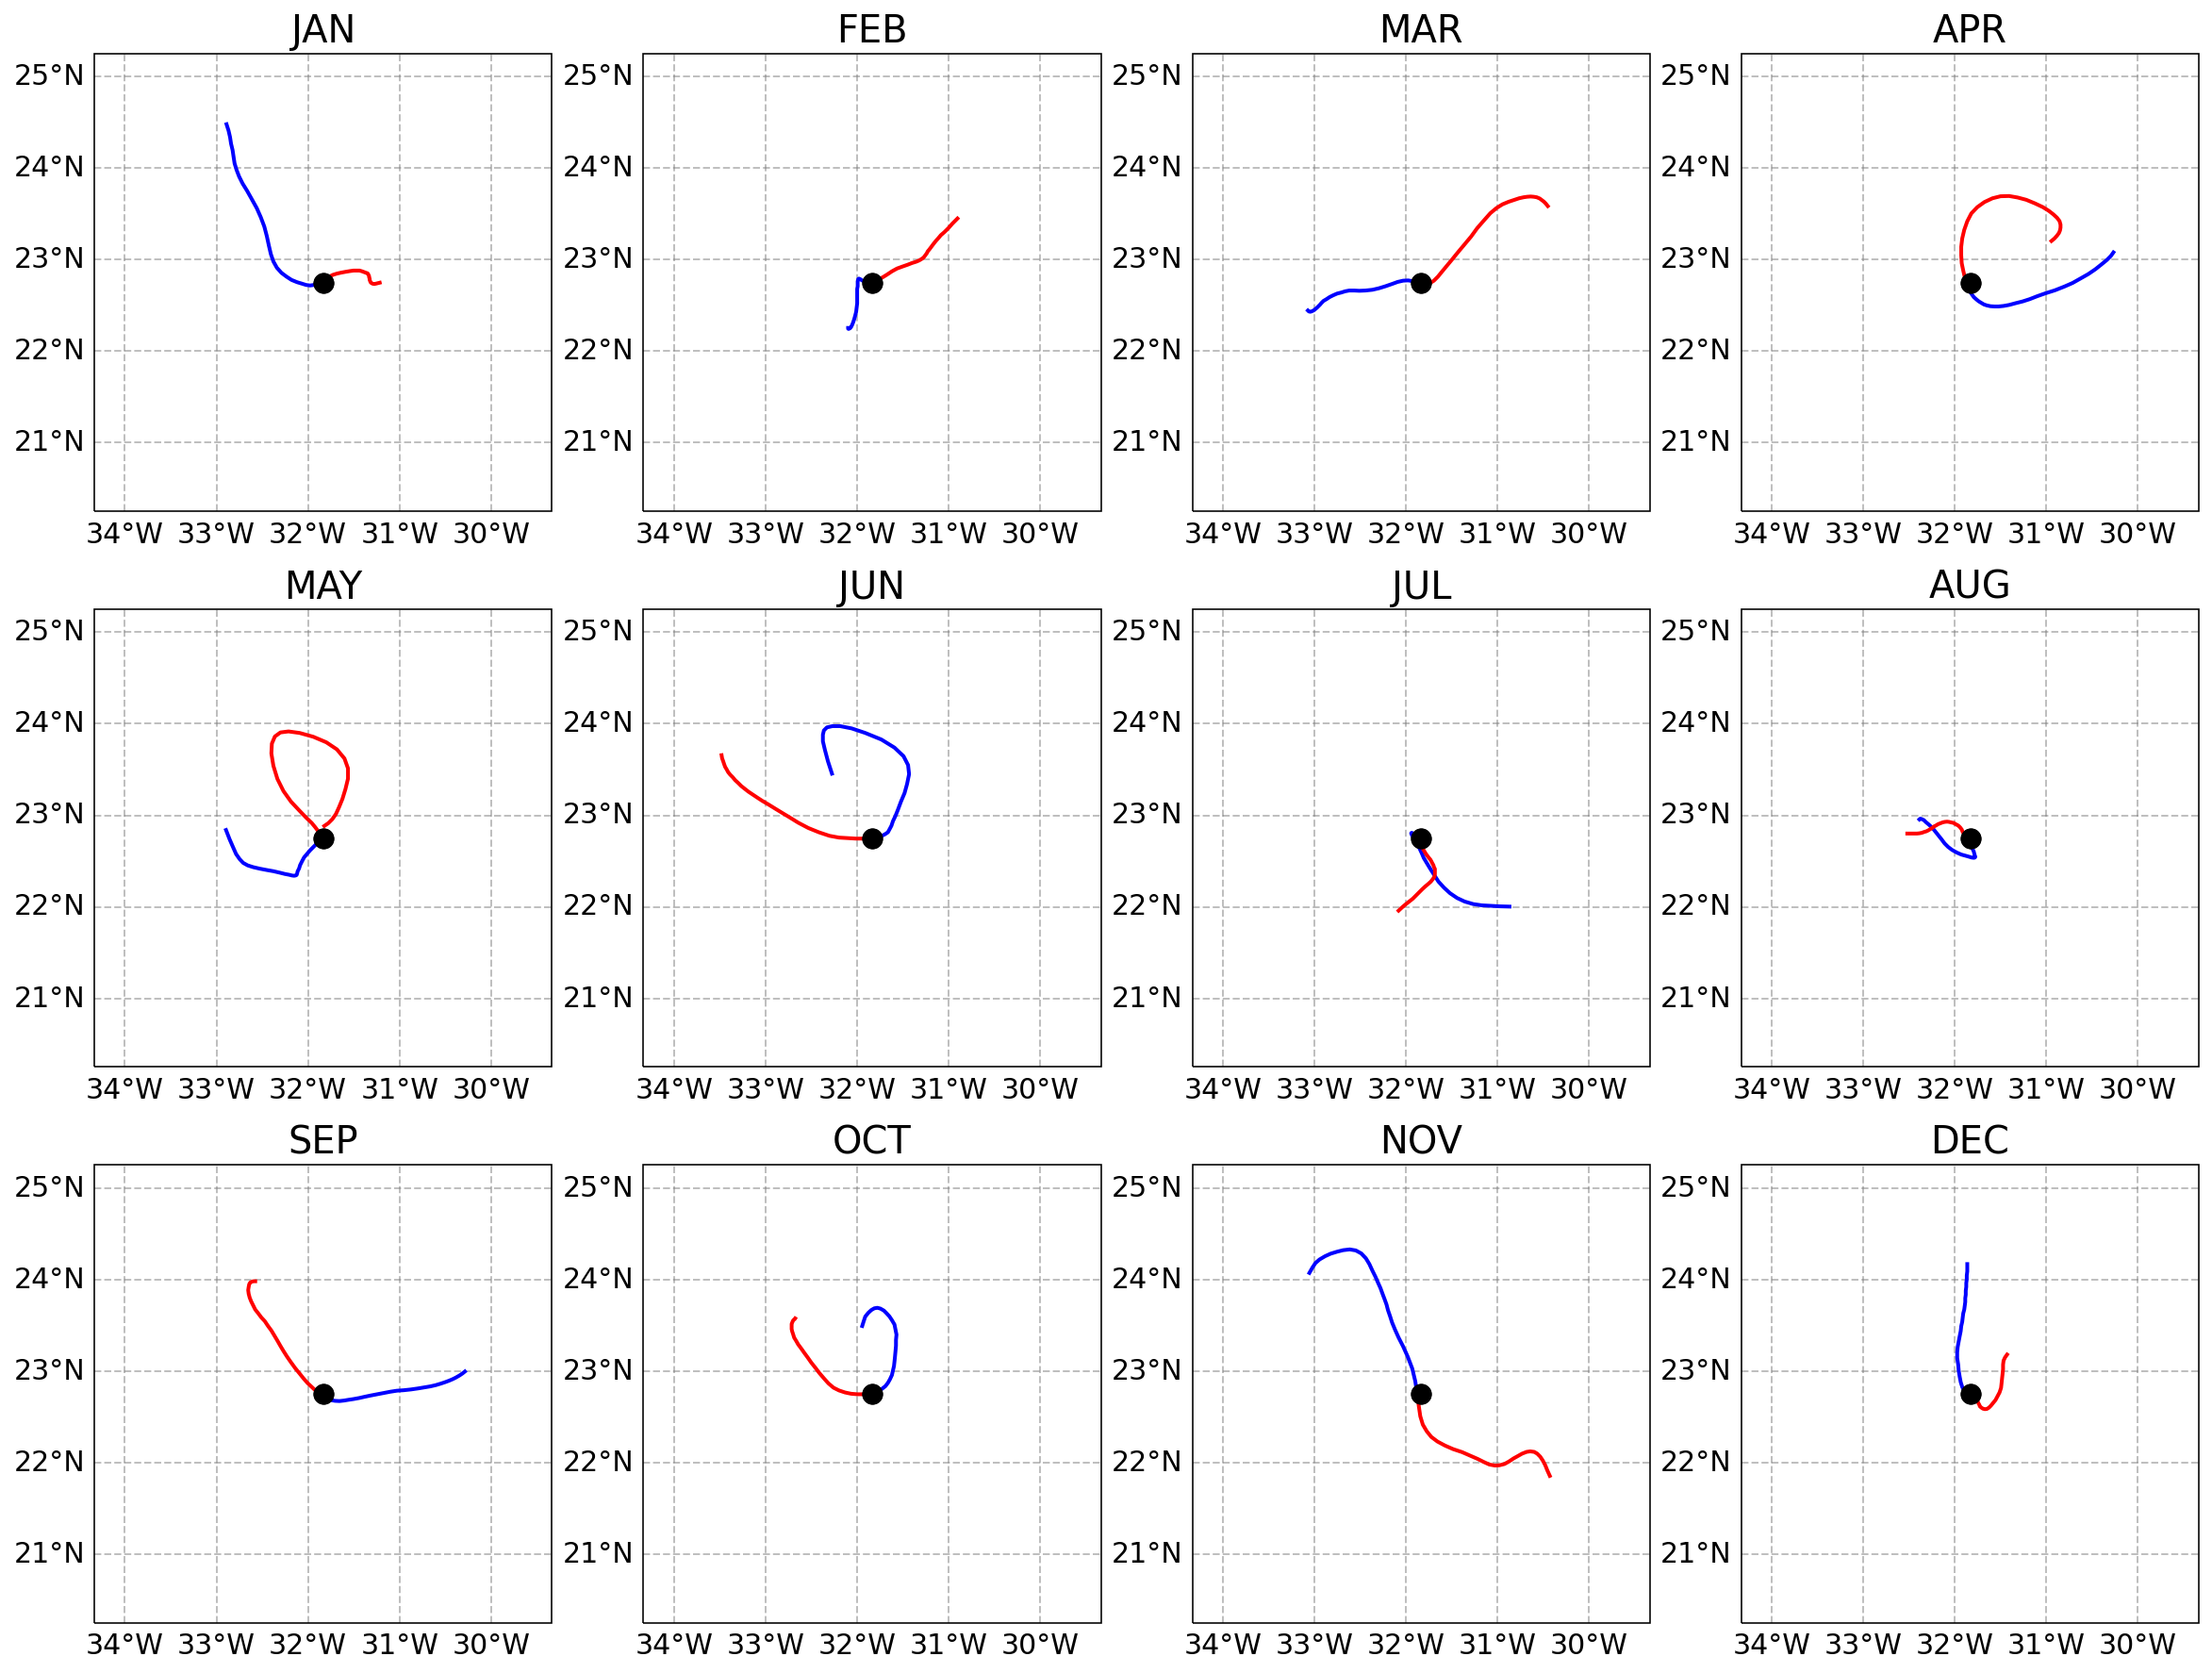

In [7]:
#Define box of interest (CHANGE FOR DIFFERENT AREA)
Max_lon    = float(LON_station)+2.5
Min_lon    = float(LON_station)-2.5
Max_lat    = float(LAT_station)+2.5
Min_lat    = float(LAT_station)-2.5

fig, axs = plt.subplots(3,4, figsize=(20,16), \
                gridspec_kw={'hspace': 0.05}, subplot_kw={'projection': ccrs.PlateCarree()})

months = [["JAN", "FEB", "MAR", "APR"],\
          ["MAY", "JUN", "JUL", "AUG"],\
          ["SEP", "OCT", "NOV", "DEC"] ]

for ir in range(3):
    for ic in range(4):
        
        axs[ir][ic].scatter([float(LON_station),float(LON_station)], [float(LAT_station),float(LAT_station)])
        axs[ir][ic].set_title(months[ir][ic], fontsize = 20) 
        axs[ir][ic].set_xlim([Min_lon, Max_lon])
        axs[ir][ic].set_ylim([Min_lat, Max_lat])
        
        # backward trajectories
        axs[ir][ic].plot(trajlon[ir*4+ic, :30], trajlat[ir*4+ic, :30], color='b', linestyle='-', lw=2, transform=ccrs.PlateCarree(), zorder=10)
        
        # forward trajectories
        axs[ir][ic].plot(trajlon[ir*4+ic, 29:], trajlat[ir*4+ic, 29:], color='r', linestyle='-', lw=2, transform=ccrs.PlateCarree(), zorder=10)
        
        axs[ir][ic].scatter([float(LON_station),float(LON_station)], [float(LAT_station),float(LAT_station)],  transform=ccrs.PlateCarree(), \
                    marker = 'o', color = 'k',s = 100, zorder=11, label = Station_Name) 
        gl = axs[ir][ic].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.bottom_labels = True
        gl.right_labels = False
        gl.xlines = True
        gl.ylabel_style = {'fontsize': 15, 'color': 'k'}
        gl.xlabel_style = {'fontsize': 15, 'color': 'k'}
        

